In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from pylab import plot, show, subplot, specgram, imshow, savefig
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix, accuracy_score, classification_report
import pickle
%matplotlib inline

In [27]:
# download the dataset
!wget -O loan_train_Alex.csv https://github.com/Alex-19791980/Loan_Project/raw/main/loan_train_Alex.csv

--2020-12-21 13:54:13--  https://github.com/Alex-19791980/Loan_Project/raw/main/loan_train_Alex.csv
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Alex-19791980/Loan_Project/main/loan_train_Alex.csv [following]
--2020-12-21 13:54:13--  https://raw.githubusercontent.com/Alex-19791980/Loan_Project/main/loan_train_Alex.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.108.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22142 (22K) [text/plain]
Saving to: ‘loan_train_Alex.csv’

loan_train_Alex.csv 100%[===================>]  21.62K  --.-KB/s    in 0.001s  

2020-12-21 13:54:13 (19.5 MB/s) - ‘loan_train_Alex.csv’ saved [22142/22142]



In [28]:
# Load Data From CSV File

df = pd.read_csv('loan_train_Alex.csv')
df.head()


,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [29]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])

#add day of week and weekend columns
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

#convert Gender column to binary
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

Feature_df = df[['Principal','terms','age','Gender','weekend']]
Feature_df = pd.concat([Feature_df,pd.get_dummies(df['education'])], axis=1)
Feature_df.drop(['Master or Above'], axis = 1,inplace=True)
df.head()

,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [30]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [31]:
Feature = df[['Principal','terms','age','Gender']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,Bechalor,High School or Below,college
0,1000,30,45,0,0,1,0
1,1000,30,33,1,1,0,0
2,1000,15,27,0,0,0,1
3,1000,30,28,1,0,0,1
4,1000,30,29,0,0,0,1


In [32]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,Bechalor,High School or Below,college
0,1000,30,45,0,0,1,0
1,1000,30,33,1,1,0,0
2,1000,15,27,0,0,0,1
3,1000,30,28,1,0,0,1
4,1000,30,29,0,0,0,1


In [33]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [9]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [10]:
#Run train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [11]:
print ('Shape of X:', X.shape)

Shape of X: (346, 8)


In [12]:
print ('Shape of y:', y.shape)
print ('Shape of X_train:', X_train.shape)
print ('Shape of y_train:', y_train.shape)
print ('Shape of X_test:', X_test.shape)
print ('Shape of y_test:', y_test.shape)

Shape of y: (346,)
Shape of X_train: (276, 8)
Shape of y_train: (276,)
Shape of X_test: (70, 8)
Shape of y_test: (70,)


In [13]:
#find best value of K
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Kvals = 15
mean_acc = np.zeros((Kvals-1))
std_acc = np.zeros((Kvals-1))
for n in range(1,Kvals):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.67142857, 0.65714286, 0.71428571, 0.68571429, 0.75714286,
       0.71428571, 0.78571429, 0.75714286, 0.75714286, 0.67142857,
       0.7       , 0.72857143, 0.7       , 0.7       ])

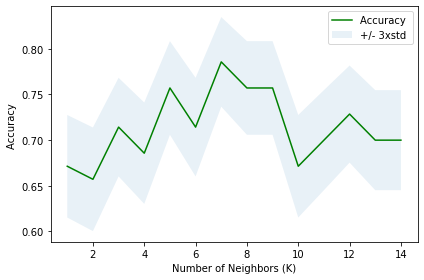

In [14]:
#plot accuracy vs k values
plt.plot(range(1,Kvals),mean_acc,'g')
plt.fill_between(range(1,Kvals),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [15]:
#therefore best value of K is 7
neigh = KNeighborsClassifier(n_neighbors = 7).fit(X_train,y_train)
yhat=neigh.predict(X_test)
print("KNN Accuracy: ", metrics.accuracy_score(y_test, yhat))

KNN Accuracy:  0.7857142857142857


In [16]:
#train decision tree model
from sklearn.tree import DecisionTreeClassifier
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
loanTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [17]:
#predict target variable
predDT = loanTree.predict(X_test)

In [18]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predDT))

DecisionTrees's Accuracy:  0.7714285714285715


In [19]:
#Find the best kernel to use
from sklearn import svm
acc_score = np.zeros(3)
n = 0

for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    svm_yhat = clf.predict(X_test)
    acc_score[n] = metrics.accuracy_score(y_test, svm_yhat)
    n = n + 1

acc_score

array([0.78571429, 0.77142857, 0.74285714])

In [20]:
print("SVM Accuracy: ", metrics.accuracy_score(y_test, svm_yhat))

SVM Accuracy:  0.7428571428571429


In [21]:
from sklearn.linear_model import LogisticRegression
#find optimal solver parameter
LR_accu = np.zeros(5)
n = 0

for solver in ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga' ):
    LR = LogisticRegression(C=0.01, solver=solver)
    LR.fit(X_train, y_train)
    LR_yhat = LR.predict(X_test)
    LR_accu[n] = metrics.accuracy_score(y_test, LR_yhat)
    n = n + 1

LR_accu

array([0.78571429, 0.78571429, 0.68571429, 0.78571429, 0.78571429])

In [22]:
print("Logistic Regression Accuracy: ", metrics.accuracy_score(y_test, LR_yhat))

Logistic Regression Accuracy:  0.7857142857142857


In [36]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [40]:
Test_X = Feature_df
Test_y = df['loan_status'].values

#predict using different algo's
#KNN
KNN_yhat = neigh.predict(Test_X)

#Decision Trees
DT_yhat = loanTree.predict(Test_X)

#SVM
SVM_yhat = clf.predict(Test_X)

#Logistic Trees
Log_yhat = LR.predict(Test_X)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit(Test_y)

KNN_fs = f1_score(mlb.transform(Test_y), mlb.transform(KNN_yhat), average='micro')
DT_fs = f1_score(mlb.transform(Test_y), mlb.transform(DT_yhat), average='micro')
SVM_fs = f1_score(mlb.transform(Test_y), mlb.transform(SVM_yhat), average='micro')
LG_fs = f1_score(mlb.transform(Test_y), mlb.transform(Log_yhat), average='micro')

yhat_proba = LR.predict_proba(Test_X)

Accuracy = {'Algorithm': ['KNN','Decision Tree','SVM','LogisticRegression'],
             'Jaccard':[jaccard_score(Test_y, KNN_yhat), jaccard_score(Test_y, DT_yhat),
                       jaccard_score(Test_y, SVM_yhat),jaccard_score(Test_y, Log_yhat)],
            'F1-score':[KNN_fs, DT_fs, SVM_fs, LG_fs],
            'LogLoss':['NA', 'NA', 'NA',log_loss(Test_y, yhat_proba)]}

Report_df = pd.DataFrame(Accuracy)
Report_df.set_index('Algorithm',inplace = True)

Report_df = Report_df[['Jaccard','F1-score','LogLoss']]

Report_df